In [30]:
from pathlib import Path 
import tarfile
import urllib.request

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
csv_file_path = "creditcard_2023.csv"

# Read the CSV file and create a DataFrame
df = pd.read_csv(csv_file_path)



In [32]:
df.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240375 entries, 0 to 240374
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      240375 non-null  int64  
 1   V1      240375 non-null  float64
 2   V2      240374 non-null  float64
 3   V3      240374 non-null  float64
 4   V4      240374 non-null  float64
 5   V5      240374 non-null  float64
 6   V6      240374 non-null  float64
 7   V7      240374 non-null  float64
 8   V8      240374 non-null  float64
 9   V9      240374 non-null  float64
 10  V10     240374 non-null  float64
 11  V11     240374 non-null  float64
 12  V12     240374 non-null  float64
 13  V13     240374 non-null  float64
 14  V14     240374 non-null  float64
 15  V15     240374 non-null  float64
 16  V16     240374 non-null  float64
 17  V17     240374 non-null  float64
 18  V18     240374 non-null  float64
 19  V19     240374 non-null  float64
 20  V20     240374 non-null  float64
 21  V21     24

In [34]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,240375.000000,240375.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,...,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000,240374.000000
mean,120187.000000,0.468267,-0.497325,0.744174,-0.716958,0.319114,0.447171,0.482405,-0.143351,0.587595,...,-0.110897,-0.029877,-0.017816,0.130960,-0.016451,-0.067314,-0.213685,-0.098840,12031.665932,0.001822
std,69390.429816,0.796273,0.719841,0.710051,0.673423,0.667983,0.725670,0.552932,0.243224,0.755382,...,0.292365,0.654496,0.646546,1.129807,0.828838,1.088182,0.476140,0.801623,6931.583830,0.042648
min,0.000000,-3.495584,-49.966572,-2.631176,-4.951222,-5.182978,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-8.226969,-10.498633,-29.510941,50.120000,0.000000
25%,60093.500000,-0.145148,-0.662598,0.220422,-1.070969,-0.000236,0.032014,0.257604,-0.196991,0.135718,...,-0.194853,-0.516241,-0.189960,-0.594775,-0.537567,-0.790912,-0.316913,-0.220058,6033.217500,0.000000
50%,120187.000000,0.194504,-0.423085,0.641593,-0.613570,0.213210,0.333205,0.438769,-0.145553,0.457828,...,-0.116339,-0.048575,-0.044176,0.125527,0.017240,-0.122761,-0.234729,-0.064437,12009.705000,0.000000
75%,180280.500000,1.038454,-0.194509,1.177071,-0.285751,0.491046,0.713560,0.637961,-0.076103,0.897550,...,-0.034210,0.419909,0.111115,0.912266,0.527086,0.562185,-0.134260,0.088130,18044.062500,0.000000
max,240374.000000,2.229046,4.361865,14.125834,3.201536,42.716891,9.704313,41.880045,5.958040,20.270062,...,8.087080,12.632511,31.707627,11.057645,14.621509,5.623285,30.339264,77.255937,24039.930000,1.000000


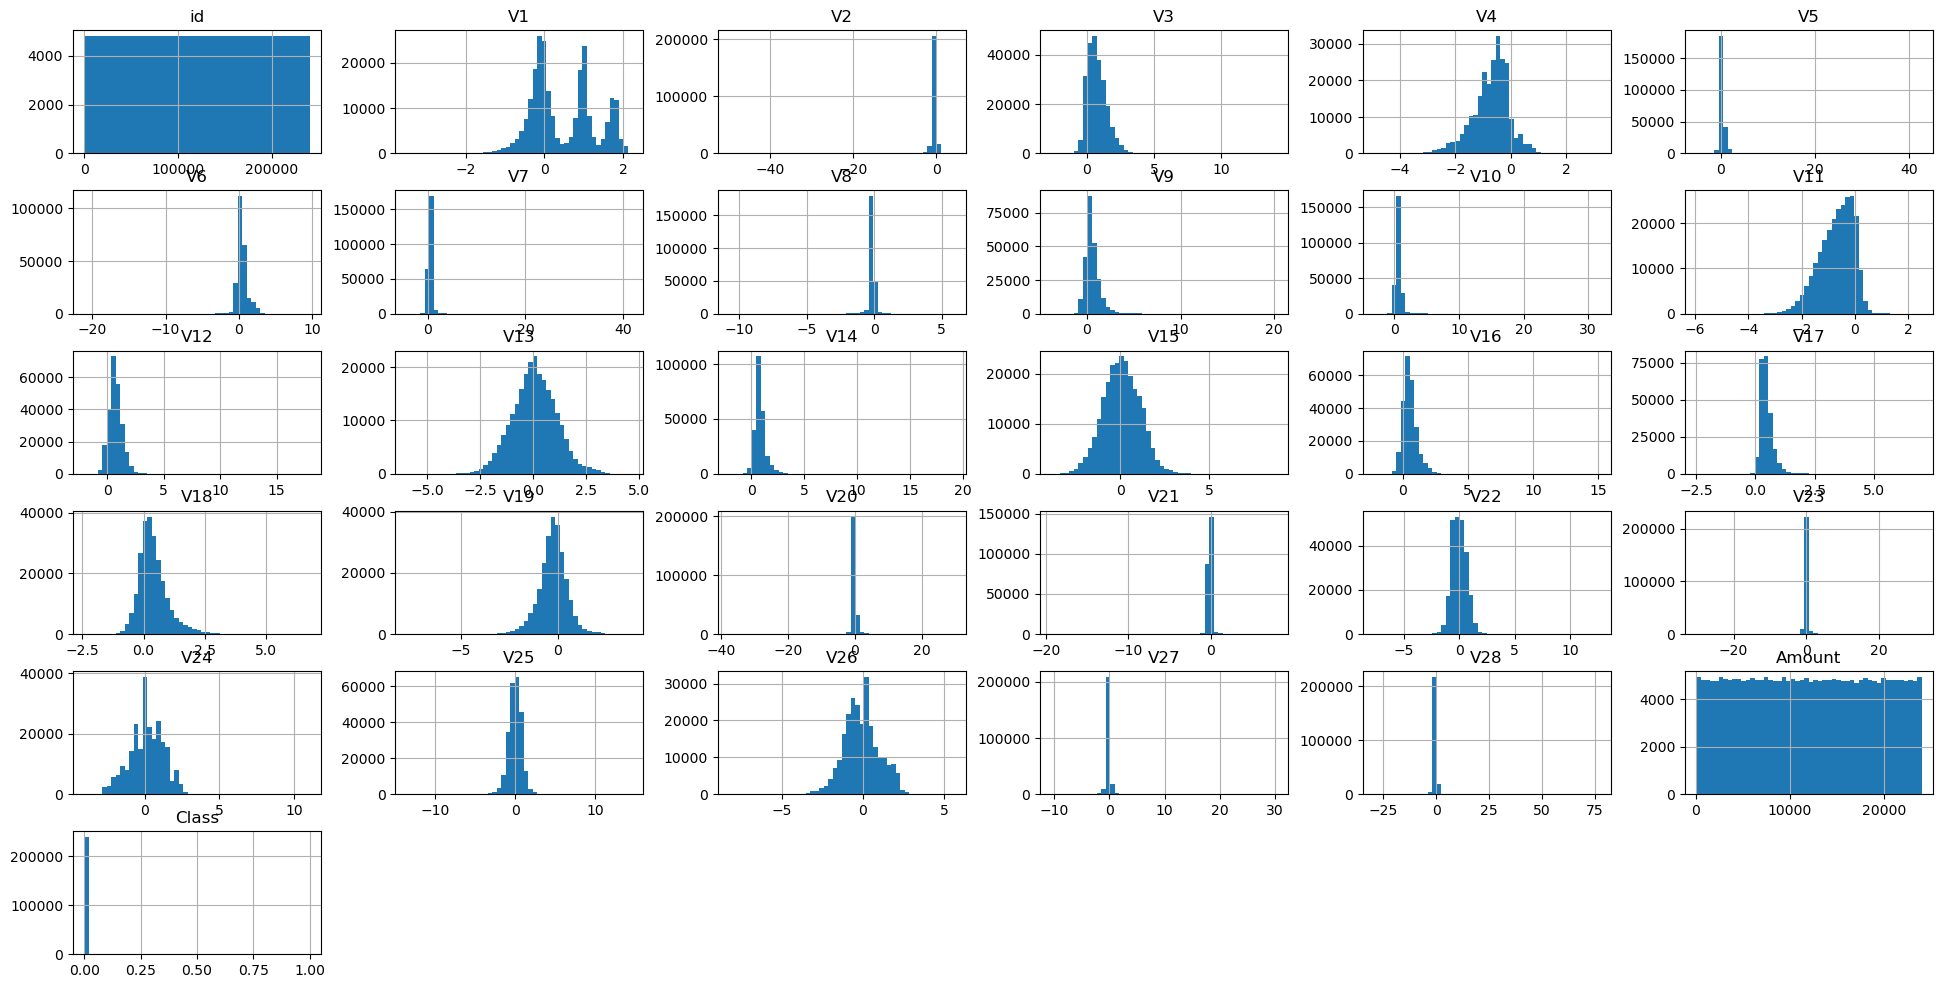

In [35]:
df.hist(bins=50, figsize=(24, 12))
plt.show()

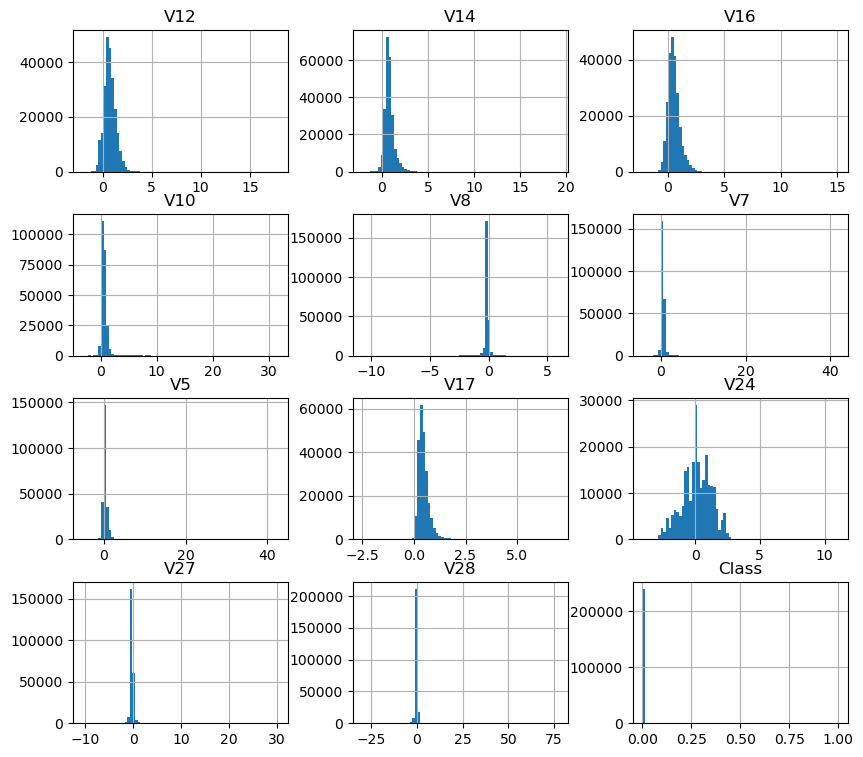

In [36]:
df[['V12','V14','V16','V10','V8', 'V7', 'V5', 'V17', 'V24', 'V27', 'V28', 'Class']].hist(bins=75, figsize=(10, 9))
plt.show()

In [42]:
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.199888,-0.025655,-0.399958,-0.101880,0.142727,-0.058119,0.073605,-0.051477,-0.009041,...,0.045858,0.154473,0.046803,-0.015656,-0.208105,-0.042621,-0.005375,-0.005806,0.000782,-0.011032
V1,0.199888,1.000000,-0.032503,-0.382842,0.104563,-0.142085,-0.030855,-0.191124,-0.042428,0.053930,...,-0.014943,-0.021105,-0.008364,0.000675,0.088743,0.001935,-0.087905,-0.003833,-0.001767,-0.055332
V2,-0.025655,-0.032503,1.000000,0.060699,-0.006570,-0.232115,0.084080,-0.136207,0.034641,-0.028297,...,-0.002202,0.015587,-0.094004,-0.006865,-0.019429,0.012876,-0.090798,-0.020050,0.001737,0.061704
V3,-0.399958,-0.382842,0.060699,1.000000,0.049831,-0.105642,0.031514,-0.088107,0.014394,0.001570,...,0.012430,0.052558,-0.042646,0.020059,-0.007935,0.015936,-0.031028,-0.015856,-0.004469,-0.086290
V4,-0.101880,0.104563,-0.006570,0.049831,1.000000,0.019195,-0.030673,0.037724,0.003558,-0.000327,...,-0.001612,-0.013690,0.022239,-0.015905,-0.007313,0.031405,-0.001469,0.000477,0.000964,0.094301
V5,0.142727,-0.142085,-0.232115,-0.105642,0.019195,1.000000,-0.069548,-0.072195,0.002267,-0.004103,...,-0.005277,-0.008616,0.039081,0.057226,0.013541,-0.004439,0.082262,-0.027521,-0.001358,-0.045838
V6,-0.058119,-0.030855,0.084080,0.031514,-0.030673,-0.069548,1.000000,0.075010,0.030014,0.005244,...,-0.010760,0.012151,-0.014226,0.003030,0.000310,-0.002884,-0.032540,0.012934,0.002427,-0.051887
V7,0.073605,-0.191124,-0.136207,-0.088107,0.037724,-0.072195,0.075010,1.000000,-0.136651,-0.002009,...,-0.009267,0.004886,0.070654,0.001360,-0.012757,-0.015088,0.080120,-0.014639,0.004551,-0.080605
V8,-0.051477,-0.042428,0.034641,0.014394,0.003558,0.002267,0.030014,-0.136651,1.000000,-0.033008,...,0.092090,-0.018893,-0.017265,0.008382,0.004000,0.005288,-0.026251,-0.006082,0.000018,0.053851
V9,-0.009041,0.053930,-0.028297,0.001570,-0.000327,-0.004103,0.005244,-0.002009,-0.033008,1.000000,...,-0.030558,0.016895,-0.003794,0.000742,0.030096,-0.019849,0.058560,-0.001014,-0.002391,-0.066611
